[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/NumEconNotebooks/master?urlpath=lab/tree/micro/01_Budgetset.ipynb)

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

import numecon.micro.consumption as consumption

# Static: Budget set with exogenous income

$$ 
C(p_1,p_2,I) = \{(x_1,x_2) \in \mathbb{R}_{+}^2 \,\, | \,\, p_1 x_1 + p_2 x_2 \leq I\}
$$

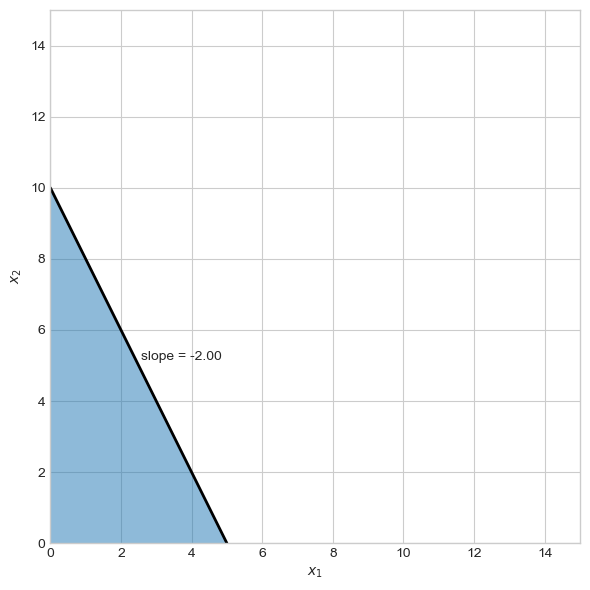

In [2]:
consumer = consumption.ConsumerClass(p1=2,p2=1,I=10,x1max=15,x2max=15)
fig,ax = consumer.figure()   
consumer.plot_budgetline(ax,color='black')
consumer.plot_budgetset(ax)
consumer.plot_budgetline_slope(ax)

# Static: Budget set with endowment

$$
C(p_1,p_2,e_1,e_2) = \{(x_1,x_2) \in \mathbb{R}_{+}^2 \,\, | \,\, p_1 x_1 + p_2 x_2 \leq p_1 e_1 + p_2 e_2\}
$$

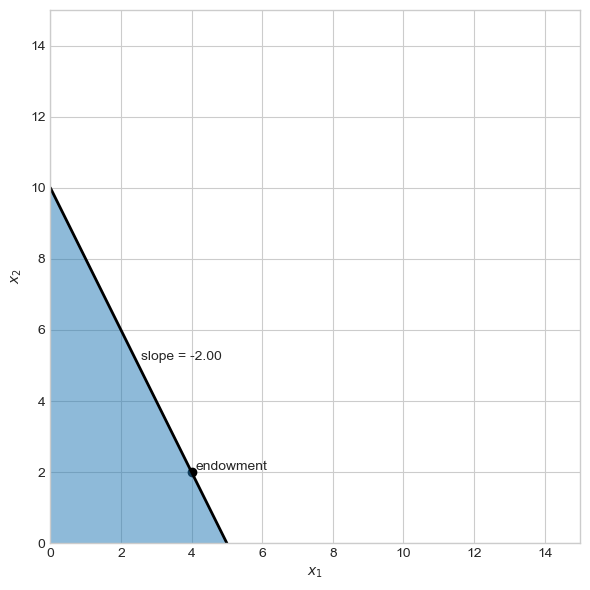

In [3]:
consumer = consumption.ConsumerClass(budgetsettype='endogenous',p1=2,p2=1,e1=4,e2=2,x1max=15,x2max=15)
fig,ax = consumer.figure()   
consumer.plot_budgetline(ax,color='black')
consumer.plot_budgetset(ax)
consumer.plot_budgetline_slope(ax)
consumer.plot_endowment(ax)

# Static: Kinked budget set

$$ 
C(p_{1},\overline{x}_1,\Delta_1,p_{2},I) = \left\{ (x_{1},x_{2})\in\mathbb{R}_{+}^{2}\,|\,\begin{cases}
p_{1}x_{1}+p_{2}x_{2} \leq I & \text{hvis }x_{1}\leq\overline{x}_{1}\\
({p_{1}-\Delta_1})(x_{1}-\overline{x}_1)+p_{2}x_{2} \leq  I-p_{1}\overline{x}_1 & \text{hvis }x_{1}>\overline{x}_{1}
\end{cases}\right\}
$$

where $\overline{x}_1$ is the kink point, and $\Delta_1$ is the price reduction.

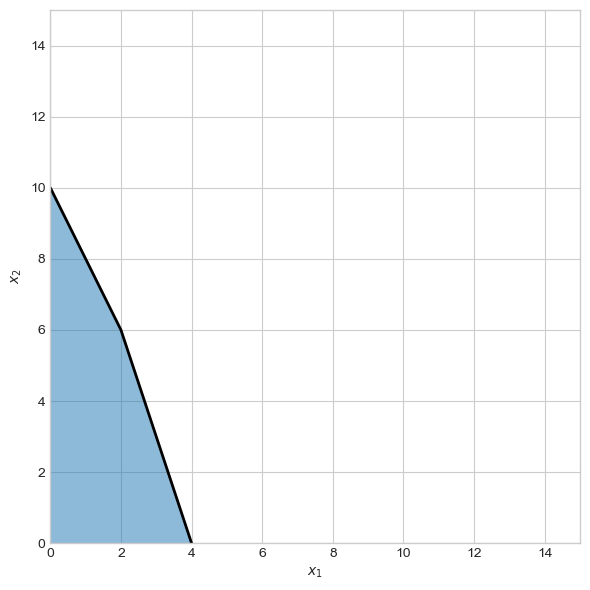

In [4]:
consumer = consumption.ConsumerClass(budgetsettype='kinked',p1=2,p2=1,I=10,kink_point=2,kink_slope=-1,x1max=15,x2max=15)
fig,ax = consumer.figure()   
consumer.plot_budgetline(ax,color='black')
consumer.plot_budgetset(ax)

# Interactive: Budget set with exogenous income

In [5]:
consumption.interactive_budgetset(budgetsettype='exogenous')

interactive(children=(FloatSlider(value=2.0, description='$p_1$', max=5.0, min=0.1, step=0.05), FloatSlider(va…

# Interactive: Budget set with endowment

In [6]:
consumption.interactive_budgetset(budgetsettype='endogenous')

interactive(children=(FloatSlider(value=2.0, description='$p_1$', max=5.0, min=0.1, step=0.05), FloatSlider(va…

# Interactive: Kinked budget set

In [7]:
consumption.interactive_budgetset(budgetsettype='kinked',x1max=12,x2max=12)

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=5.0, min=0.1, step=0.05), FloatSlider(va…

# Interactive: Budget set with exogenous income in 3D

$$
C(p_1,p_2,p_3,I) = \{(x_1,x_2,x_3) \in \mathbb{R}_{+}^3 \,\, | \,\, p_1 x_1 + p_2 x_2 + p_3 x_3 \leq I\}
$$

In [8]:
def _D3(p1,p2,p3,I,elev,angle):

    # a. figure
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(1,1,1,projection='3d')
        
    # b. edges
    xmax = I/p1
    ymax = I/p2
    zmax = I/p3

    edges = [[[0,0,0],[0,0,zmax],[0,ymax,0]]]
    edges.append([[0,0,0],[0,0,zmax],[xmax,0,0]])
    edges.append([[0,0,0],[0,ymax,0],[xmax,0,0]])
    edges.append([[0,0,zmax],[0,ymax,0],[xmax,0,0]])
        
    # c. faces
    faces = Poly3DCollection(edges, linewidths=1, edgecolors='black')
    faces.set_alpha(0.35)
    faces.set_facecolor(colors[0])
    ax.add_collection3d(faces)

    # d. details
    ax.set_aspect('equal')
    ax.set_xlim(0,15)
    ax.set_ylim(0,15)
    ax.set_zlim(0,15)        
    ax.invert_yaxis()    
    ax.set_xlabel('$x_1$')        
    ax.set_ylabel('$x_2$')        
    ax.set_zlabel('$x_3$')

    # e. rotation
    ax.view_init(elev,angle)

def D3():

    widgets.interact(_D3,
                    p1=widgets.FloatSlider(description='$p_1$',min=0.1, max=5, step=0.05, value=1), 
                    p2=widgets.FloatSlider(description='$p_2$',min=0.1, max=5, step=0.05, value=1), 
                    p3=widgets.FloatSlider(description='$p_3$',min=0.1, max=5, step=0.05, value=1), 
                    I=widgets.FloatSlider(description='$I$',min=0.10, max=20, step=0.10, value=10),
                    elev=widgets.FloatSlider(description='elevation',min=0, max=180, step=5, value=30), 
                    angle=widgets.FloatSlider(description='angle',min=0, max=360, step=5, value=300))
    
D3()

interactive(children=(FloatSlider(value=1.0, description='$p_1$', max=5.0, min=0.1, step=0.05), FloatSlider(va…